In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
movie = pd.read_csv("resources/movie_metadata.csv")
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [12]:
movies = movies.rename(columns={"movie_title": "name", "num_voted_users": "total_votes", "imdb_score": "rating", "gross": "gross_earnings"})
movies = movies[["name", "total_votes", "rating", "gross_earnings", "duration"]]
movies = movies.dropna(how='any')
movies.head()

,name,total_votes,rating,gross_earnings,duration
0,Avatar,886204,7.9,760505847.0,178.0
1,Pirates of the Caribbean: At World's End,471220,7.1,309404152.0,169.0
2,Spectre,275868,6.8,200074175.0,148.0
3,The Dark Knight Rises,1144337,8.5,448130642.0,164.0
5,John Carter,212204,6.6,73058679.0,132.0


In [13]:
X = movies["total_votes"].values.reshape(-1, 1)
y = movies["gross_earnings"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4157, 1) (4157, 1)


Text(0, 0.5, 'Gross Earnings')

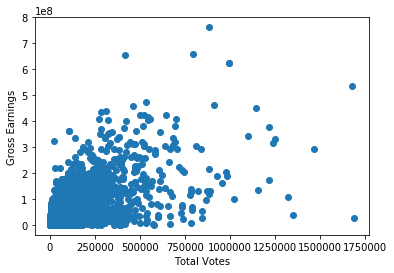

In [14]:
plt.scatter(X, y)
plt.xlabel("Total Votes")
plt.ylabel("Gross Earnings")

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
# Fit data to the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [17]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_test_scaled = y_scaler.transform(y_test)
y_train_scaled = y_scaler.transform(y_train)

In [18]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test_scaled)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test_scaled, predicted)
r2 = r2_score(y_test_scaled, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.006927718860616516
R-squared (R2 ): 0.4232033253865246


In [20]:
print(model.score(X_train_scaled, y_train_scaled))
print(model.score(X_test_scaled, y_test_scaled))

0.3987377737662071
0.42320332538652466
